In [36]:
# https://wikidocs.net/89354
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

labels = ['fail', 'pass']

##########데이터 분석

##########데이터 전처리

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

##########모델 생성

model = LogisticRegression()
#model = LogisticRegression(max_iter=100, penalty='l2', C=1.0)

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

##########모델 예측

x_test = np.array([
    [4, 6]
])

y_predict = model.predict(x_test)
print(y_predict) #[1]
print(y_predict[0]) #1
label = labels[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

print(label, confidence) #

x_test = np.array([
    [4, 6], 
    [10, 11]
])
print('xtest 2차원 -------------------------')
y_predict = model.predict(x_test)
print(y_predict) #[1 1]
print(y_predict[0]) #1
label = labels[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]
print(label, confidence) #


y_predict = model.predict(x_test)
print(y_predict[1]) #1

label = labels[y_predict[1]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[1][y_predict[1].argmax()]
print(label, confidence) #

[0]
0
fail 0.5817659727427806
xtest -------------------------
[0 1]
0
fail 0.5817659727427806
1
pass 0.9991796396334955


In [33]:
x_test = np.array([
    [4, 6]
])

y_predict = model.decision_function(x_test)

print(y_predict) #[-2.245277195662771]

[-0.33002711]


In [34]:
x_test = np.array([
    [4, 6]
])

y_predict = model.predict_proba(x_test)

print(y_predict) #[[0.82316479 0.17683521]]

[[0.58176597 0.41823403]]


## [이항분류의 평가분류지표] 혼합행렬, 혼돈 행렬
- 혼합행렬은 다항분류도 가능하다
- 이미지가 히트맵 기준으로 아래의 정확도, 재현율이 계산되어 있음
- 계산 모듈 있음
  - TP : True  --> True  예측 정답
  - FP : False --> True  예측 오답
  - FN : True  --> False 예측 오탁
  - TN : False --> False 예측 정답

[1 1 0 0]
[1 1 0 0]
[[2 0]
 [0 2]]
====정확도====
1.0
====재현율====
1.0
====정밀도====
1.0
====fi_score====
1.0


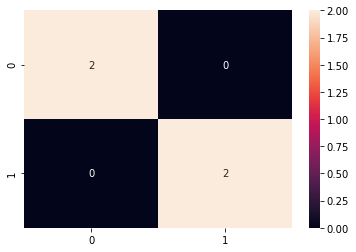

In [52]:
# https://wikidocs.net/45729
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

labels = ['fail', 'pass']

##########데이터 전처리

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)

##########모델 생성

model = LogisticRegression()

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

y_predict = model.predict(x_test)

print(y_test) #[1, 1, 0, 0]
print(y_predict) #[1 1 0 0]
cm = confusion_matrix(y_test, y_predict) 
print(cm) 
'''
[[2 0]
 [0 2]]
'''

accuracy_score = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]) #정확도
print('====정확도====')
print(accuracy_score) #1.0

recall_score = (cm[1][1]) / (cm[1][0]+cm[1][1]) #재현율
print('====재현율====')
print(recall_score) #1.0 
#--

precision_score = (cm[1][1]) / (cm[0][1] + cm[1][1]) #정밀도
print('====정밀도====')
print(precision_score) #1.0
#|
#|

f1_score = ((precision_score * recall_score) / (precision_score + recall_score)) * 2
print('====fi_score====') #크면 클수록 좋다
print(f1_score) #1.0 #F1 score

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.show()


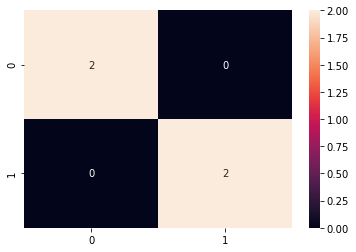

In [53]:
# 혼합행렬
from sklearn.metrics import confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)

y_predict = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict) 

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.show()


## 분류보고서

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## 값의 연관석 확인
- summary에서 보이는 pvalue 값이 0.05보다 크면 x값에서 제거함.(보통)

In [56]:
import statsmodels.api as sm
logit_mod = sm.Logit(y_train, x_train)
results = logit_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.483183
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:                  0.2696
Time:                        15:10:33   Log-Likelihood:                -3.8655
converged:                       True   LL-Null:                       -5.2925
Covariance Type:            nonrobust   LLR p-value:                   0.09114
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0800      0.583      0.137      0.891      -1.063       1.223
x2             0.1752      0.538      0.326      0.744      -0.879       1.229
==============================================================================
"""

## ROC 커브곡선(직접찾아서 작성)
- 이항분류에서 일치율을 시각화함. 이때 ROC 하단면적을 AUC 라고 함, AUC 가 클수록 좋은 결과임